In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Прогнозирование инсульта

### Чтение данных

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',', header=0,  engine='python')
type(data)

pandas.core.frame.DataFrame

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Рассматриваемые признаки
1. id
2. Age - возраст пациента;
3. Hypertension - синдром повышения систолического артериального давления (САД) от 140 мм рт. ст. и выше, и одновременно или самостоятельно — диастолического АД (ДАД) ≥ 90 мм рт. ст.;
4. heart_disease - наличие болезней, связанных с сердцем;
5. ever_married - состоял ли человек в браке;
6. work_type - тип работы, которой занимался(занимается) пациент;
7. Residence_type - тип жилья, в котором жил(живет) пациент;
8. avg_glucose_level - уровень глюкозы в крови;
9. bmi - индекс массы тела;
10. smoking_status - отношение человека к курению;
11. stroke - акт инсульта.

## Обработка пропущенных значений

In [4]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:

data_0 = data[data['stroke'] == 0]
data_1 = data[data['stroke'] == 1]
data_0 = data_0[0: data_1.shape[0]//3*2]
#data0# меньше
data = pd.concat((data_0, data_1), axis = 0)

### Находим категориальные признаки

In [6]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)
data.shape

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


(415, 12)

In [7]:
data.dropna(axis = 0).shape

(373, 12)

Есть пропущенные значения. Заполняем медианными значениями

In [8]:
data = data.fillna(data.median(axis = 0, numeric_only=True), axis = 0)
data.shape

(415, 12)

<AxesSubplot:xlabel='stroke', ylabel='count'>

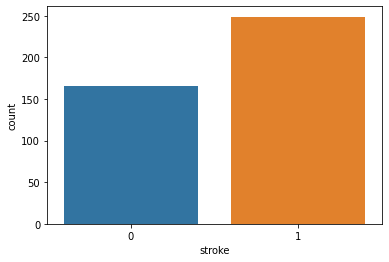

In [9]:
sns.countplot(x='stroke', data=data)

### Векторизируем данные

In [10]:
data_describe = data.describe(include = [object])

Векторизация бинарных данных

In [11]:

data.at[data['ever_married'] == 'No', 'ever_married'] = 0
data.at[data['ever_married'] == 'Yes', 'ever_married'] = 1
data['ever_married'].describe()

data.at[data['Residence_type'] == 'Urban', 'Residence_type'] = 0
data.at[data['Residence_type'] == 'Rural', 'Residence_type'] = 1
data['Residence_type'].describe()

#for c in categorical_columns:
#    data[c] = data[c].fillna(data_describe[c]['top'])
#data.describe(include = [object])

#binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
#nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

#data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print(data_nonbinary.columns)

#categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
#categorical_columns


count     415
unique      2
top         0
freq      211
Name: Residence_type, dtype: int64

In [12]:
from sklearn import preprocessing
data_describe = data.describe(include = [object])
number = preprocessing.LabelEncoder()
data["gender"] = number.fit_transform(data["gender"])
data["ever_married"] = number.fit_transform(data["ever_married"])
data["work_type"] = number.fit_transform(data["work_type"])
data["smoking_status"] = number.fit_transform(data["smoking_status"])
data["Residence_type"] = number.fit_transform(data["Residence_type"])

In [13]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
binary_columns = binary_columns[:0]


In [14]:
data['stroke'].unique()

array([0, 1], dtype=int64)

In [15]:
data.at[data['Residence_type'] == 'Urban', 'Residence_type'] = 1
data.at[data['Residence_type'] == 'Rural', 'Residence_type'] = 0
data['Residence_type'].describe()

count    415.000000
mean       0.491566
std        0.500532
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Residence_type, dtype: float64

### Нормализация 

In [16]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
len(numerical_columns)
binary_columns = numerical_columns[11:]
print(binary_columns)
numerical_columns = numerical_columns[:11]
numerical_columns

['stroke']


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [17]:
data_numerical = data[numerical_columns].astype('float32')

In [18]:
data_numerical.std(axis = 0)

id                   21571.460938
gender                   0.490489
age                     20.970556
hypertension             0.402281
heart_disease            0.342072
ever_married             0.396818
work_type                0.969304
Residence_type           0.500532
avg_glucose_level       58.695858
bmi                      7.127557
smoking_status           1.023261
dtype: float32

In [19]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical = data_numerical.fillna(0.0)

In [20]:
data['stroke'].unique()

array([0, 1], dtype=int64)

In [21]:
#data.at[data['stroke'] == 'ever_married', 'stroke'] = 1
#data.at[data['stroke'] == 'Residence_type', 'stroke'] = 0
#data['stroke'].describe()

### Соединяем все в матрицу

In [22]:
data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
data.shape


(415, 12)

In [23]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Видно, что пропусков не осталось

In [24]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,-0.319097,1.223269,-2.613629,-0.503155,-0.394478,-2.028182,1.991244,1.015786,-0.499688,-1.695506,-1.441175,0
250,-0.328415,1.223269,0.009096,1.982670,-0.394478,0.491864,-0.072093,-0.982087,-0.621673,1.278865,0.513360,0
251,-0.974871,-0.815512,-2.375200,-0.503155,-0.394478,-2.028182,-0.072093,-0.982087,-0.231015,-1.751626,-1.441175,0
252,0.880358,-0.815512,0.581327,-0.503155,-0.394478,0.491864,-0.072093,1.015786,-0.944012,0.815873,-0.463908,0
253,0.397915,1.223269,-2.089084,-0.503155,-0.394478,-2.028182,-1.103761,1.015786,0.627479,-1.541176,-1.441175,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.918500,1.223269,-0.038590,-0.503155,-0.394478,0.491864,-0.072093,1.015786,-0.672784,0.928114,-1.441175,1
245,0.561696,-0.815512,-2.089084,-0.503155,-0.394478,-2.028182,1.991244,1.015786,-1.133293,0.114370,-1.441175,1
246,-0.482090,-0.815512,0.819756,-0.503155,-0.394478,0.491864,0.959576,1.015786,-0.777731,-0.110110,-0.463908,1
247,-0.161898,1.223269,0.629013,1.982670,-0.394478,0.491864,0.959576,1.015786,-0.624398,-0.152201,-1.441175,1


<AxesSubplot:xlabel='stroke', ylabel='count'>

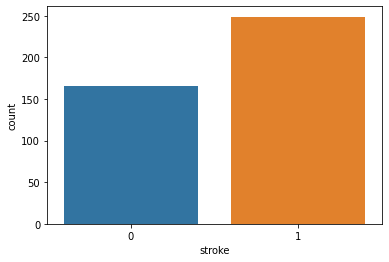

In [25]:
sns.countplot(x='stroke', data=data)

In [26]:
#data_0 = data[data['stroke'] == 4.417948]
#data_1 = data[data['stroke'] == -0.226305]
#data_0 = data_0[0: data_1.shape[0]*2]
#data0# меньше
#data = pd.concat((data_0, data_1), axis = 0)

In [27]:
#sns.countplot(x='stroke', data=data)

## Разбиение данных на обучающую и тестовую выборки

In [28]:
data = data.sample(frac=1)
X = data.drop('stroke', axis = 1)
y = data['stroke']
X = X.to_numpy()
y = y.to_numpy(dtype='int32')



In [29]:
X.shape

(415, 11)

In [30]:
y.shape

(415,)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

290 125


In [32]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [33]:
y_train

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0])

In [34]:
np.unique(y_test)

array([0, 1])

In [35]:
np.unique(y_train)

array([0, 1])

# Обучаем классификатор

## 1 скрытный слой

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1,
                          tol=1e-4)

In [38]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.88891755
Iteration 2, loss = 0.87125194
Iteration 3, loss = 0.85347680
Iteration 4, loss = 0.83581099
Iteration 5, loss = 0.81973203
Iteration 6, loss = 0.80510892
Iteration 7, loss = 0.78954938
Iteration 8, loss = 0.77568879
Iteration 9, loss = 0.76288591
Iteration 10, loss = 0.75025151
Iteration 11, loss = 0.73846215
Iteration 12, loss = 0.72826868
Iteration 13, loss = 0.71785359
Iteration 14, loss = 0.70888404
Iteration 15, loss = 0.70004792
Iteration 16, loss = 0.69187296
Iteration 17, loss = 0.68510612
Iteration 18, loss = 0.67834363
Iteration 19, loss = 0.67296526
Iteration 20, loss = 0.66710661
Iteration 21, loss = 0.66239911
Iteration 22, loss = 0.65789431
Iteration 23, loss = 0.65426014
Iteration 24, loss = 0.65039836
Iteration 25, loss = 0.64722063
Iteration 26, loss = 0.64429738
Iteration 27, loss = 0.64188003
Iteration 28, loss = 0.63936139
Iteration 29, loss = 0.63723533
Iteration 30, loss = 0.63515862
Iteration 31, loss = 0.63339233
Iteration 32, los

Iteration 289, loss = 0.47366536
Iteration 290, loss = 0.47346782
Iteration 291, loss = 0.47326142
Iteration 292, loss = 0.47302809
Iteration 293, loss = 0.47276518
Iteration 294, loss = 0.47260545
Iteration 295, loss = 0.47245469
Iteration 296, loss = 0.47217442
Iteration 297, loss = 0.47196882
Iteration 298, loss = 0.47176747
Iteration 299, loss = 0.47158232
Iteration 300, loss = 0.47134602
Iteration 301, loss = 0.47115303
Iteration 302, loss = 0.47097493
Iteration 303, loss = 0.47074383
Iteration 304, loss = 0.47054819
Iteration 305, loss = 0.47032974
Iteration 306, loss = 0.47011170
Iteration 307, loss = 0.47001664
Iteration 308, loss = 0.46970573
Iteration 309, loss = 0.46953487
Iteration 310, loss = 0.46934435
Iteration 311, loss = 0.46916920
Iteration 312, loss = 0.46906907
Iteration 313, loss = 0.46878617
Iteration 314, loss = 0.46859711
Iteration 315, loss = 0.46841118
Iteration 316, loss = 0.46822182
Iteration 317, loss = 0.46808730
Iteration 318, loss = 0.46787443
Iteration 

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=2000,
              random_state=42, verbose=1)

Ошибки на тестовой выборке

In [39]:
y_test_pred = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_pred)
err_test

0.248

Ошибки на тренировочной выборке

In [40]:
y_train_pred = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_pred)
err_train

0.20344827586206896

## 2 скрытых слоя

In [41]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (50, 12),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1,
                          tol=1e-4)

In [42]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.70080673
Iteration 2, loss = 0.69489276
Iteration 3, loss = 0.68958018
Iteration 4, loss = 0.68448908
Iteration 5, loss = 0.68119398
Iteration 6, loss = 0.67750247
Iteration 7, loss = 0.67456810
Iteration 8, loss = 0.67182980
Iteration 9, loss = 0.66985456
Iteration 10, loss = 0.66844609
Iteration 11, loss = 0.66754463
Iteration 12, loss = 0.66650749
Iteration 13, loss = 0.66552370
Iteration 14, loss = 0.66538797
Iteration 15, loss = 0.66478692
Iteration 16, loss = 0.66443948
Iteration 17, loss = 0.66390418
Iteration 18, loss = 0.66335807
Iteration 19, loss = 0.66278198
Iteration 20, loss = 0.66223264
Iteration 21, loss = 0.66168336
Iteration 22, loss = 0.66105838
Iteration 23, loss = 0.66044464
Iteration 24, loss = 0.65981751
Iteration 25, loss = 0.65916352
Iteration 26, loss = 0.65851548
Iteration 27, loss = 0.65779447
Iteration 28, loss = 0.65708356
Iteration 29, loss = 0.65641398
Iteration 30, loss = 0.65571064
Iteration 31, loss = 0.65493384
Iteration 32, los

Iteration 277, loss = 0.45833487
Iteration 278, loss = 0.45823433
Iteration 279, loss = 0.45813290
Iteration 280, loss = 0.45807341
Iteration 281, loss = 0.45798491
Iteration 282, loss = 0.45800993
Iteration 283, loss = 0.45793579
Iteration 284, loss = 0.45784164
Iteration 285, loss = 0.45773936
Iteration 286, loss = 0.45763474
Iteration 287, loss = 0.45773249
Iteration 288, loss = 0.45767810
Iteration 289, loss = 0.45761667
Iteration 290, loss = 0.45767285
Iteration 291, loss = 0.45768983
Iteration 292, loss = 0.45786107
Iteration 293, loss = 0.45776704
Iteration 294, loss = 0.45762981
Iteration 295, loss = 0.45744151
Iteration 296, loss = 0.45737284
Iteration 297, loss = 0.45718609
Iteration 298, loss = 0.45697087
Iteration 299, loss = 0.45720186
Iteration 300, loss = 0.45704003
Iteration 301, loss = 0.45689036
Iteration 302, loss = 0.45687955
Iteration 303, loss = 0.45678449
Iteration 304, loss = 0.45677188
Iteration 305, loss = 0.45668778
Iteration 306, loss = 0.45675493
Iteration 

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 12), max_iter=2000,
              random_state=42, verbose=1)

Ошибки на тестовой выборке

In [43]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.248

Ошибки на тренировочной выборке

In [44]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.19310344827586207

# Подберем оптимальное значение параметра регуляризации alpha
## 1 скрытый слой

In [45]:
from sklearn.metrics import accuracy_score
import tqdm
alpha_arr = np.logspace(-10, 10, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm.tqdm_notebook(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha,
                              hidden_layer_sizes = (50,),
                              solver = 'adam', 
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42,
                              #verbose=1,
                              tol=1e-4)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\TEMP/ipykernel_12424/3799792417.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for alpha in tqdm.tqdm_notebook(alpha_arr):


  0%|          | 0/21 [00:00<?, ?it/s]

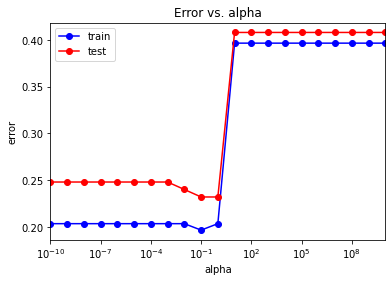

In [46]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

### Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

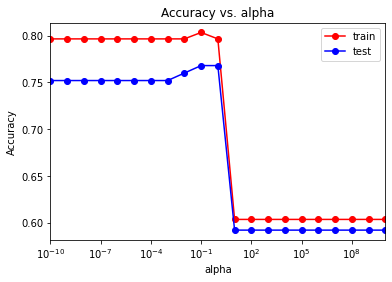

In [47]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [48]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.19655172413793104 0.232


Оптимальное значение alpha:

In [49]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.1 1. ]


In [50]:
alpha_opt = alpha_opt[0]

## Подбор числа нейронов (1 скрытый слой)

In [51]:
from sklearn.metrics import accuracy_score
import tqdm
neurons_count_arr = np.array([i for i in range(2, 100+1)])
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons_count in tqdm.tqdm_notebook(neurons_count_arr):
    mlp_model = MLPClassifier(alpha=alpha_opt,
                              hidden_layer_sizes = (neurons_count,),
                              solver = 'adam', 
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42,
                              #verbose=1,
                              tol=1e-3)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\TEMP/ipykernel_12424/1571838247.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for neurons_count in tqdm.tqdm_notebook(neurons_count_arr):


  0%|          | 0/99 [00:00<?, ?it/s]

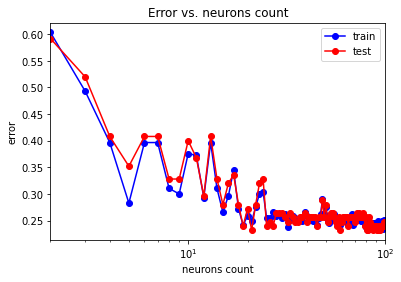

In [52]:
plt.semilogx(neurons_count_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_count_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_count_arr), np.max(neurons_count_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

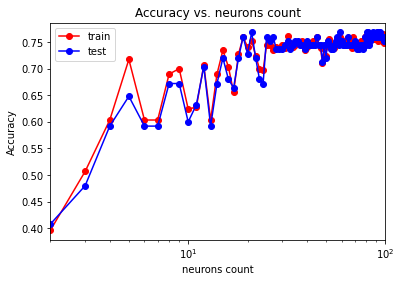

In [53]:
plt.semilogx(neurons_count_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(neurons_count_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neurons_count_arr), np.max(neurons_count_arr)])
plt.title('Accuracy vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('Accuracy')
plt.legend()

In [65]:
max_accuracy = max(test_acc)
id_of_maximum = 0
for i in range(len(test_acc)):
    if test_acc[i] == max_accuracy:
        id_of_maximum = i
neurons = neurons_count_arr[id_of_maximum]
neurons

94

# Финальное обучение с оптимальными параметрами (по точности и времени)

In [66]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (neurons,),
                          alpha=alpha_opt,
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          #verbose=1,
                          tol=1e-4)

In [67]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 1.11 s


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(94,),
              max_iter=2000, random_state=42)

Ошибки на тестовой выборке

In [68]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.232

Ошибки на тренировочной выборке

In [69]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.20344827586206896

In [70]:
1-err_test, 1-err_train

(0.768, 0.7965517241379311)

## Матрица рассогласования:

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))
y_test_pred

[[28  8]
 [23 66]]


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [72]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

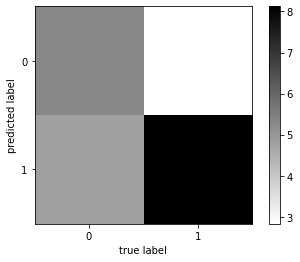

In [73]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

# Метрики качества:

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.64        51
           1       0.74      0.89      0.81        74

    accuracy                           0.75       125
   macro avg       0.76      0.72      0.73       125
weighted avg       0.76      0.75      0.74       125

